In [ ]:
#
# References:
#
# 1. splatoon-like color palette
# https://splatoonwiki.org/wiki/Template_talk:Ink
#

import math
import json
import colorsys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# set default figure size
plt.rcParams['figure.figsize'] = (12.0, 12.0)

from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

# path to data
PATH='./data/palette_splatoon.json'

# load data and create DataFrame
with open(PATH, 'r') as f:
    df_palette = pd.read_json(f)

# red
rs = []
# green
gs = []
# blue
bs = []
# hue
hs = []
# saturation
ss = []
# value
vs = []

# convert hex color string into decimal values
for color_str in df_palette.hex.values:
    # hex string to RGB
    r = int(color_str[1:3], 16)
    g = int(color_str[3:5], 16)
    b = int(color_str[5:7], 16)

    # RGB to HSV
    h, s, v = colorsys.rgb_to_hsv(r, g, b)

    # store rgb and hsv values
    rs.append(r)
    gs.append(g)
    bs.append(b)
    hs.append(h)
    ss.append(s)
    vs.append(v)

# append colors to dataframe
df_palette['r'] = rs
df_palette['g'] = gs
df_palette['b'] = bs
df_palette['h'] = hs
df_palette['s'] = ss
df_palette['v'] = vs

# calculate coordinates of hue circle
df_palette['hue_circle'] = df_palette['h'] * 2 * np.pi
df_palette['hue_x'] = np.cos(df_palette['hue_circle'])
df_palette['hue_y'] = np.sin(df_palette['hue_circle'])

# calculate complement colors
complement_colors = []
for row in df_palette.loc[:, ['hue_circle']].iterrows():
    idx = ((row[0] + df_palette['hue_circle']) % (2 * np.pi)).idxmin()
    complement_colors.append(df_palette.loc[idx])

df_palette['cmpl_name'] = pd.DataFrame(complement_colors).name.values
df_palette['cmpl_color'] = pd.DataFrame(complement_colors).hex.values
df_palette['cmpl_hue_circle'] = pd.DataFrame(complement_colors)['hue_circle'].values
df_palette['cmpl_hue_x'] = np.cos(df_palette['cmpl_hue_circle'])
df_palette['cmpl_hue_y'] = np.sin(df_palette['cmpl_hue_circle'])

# show dataframe
print(df_palette)

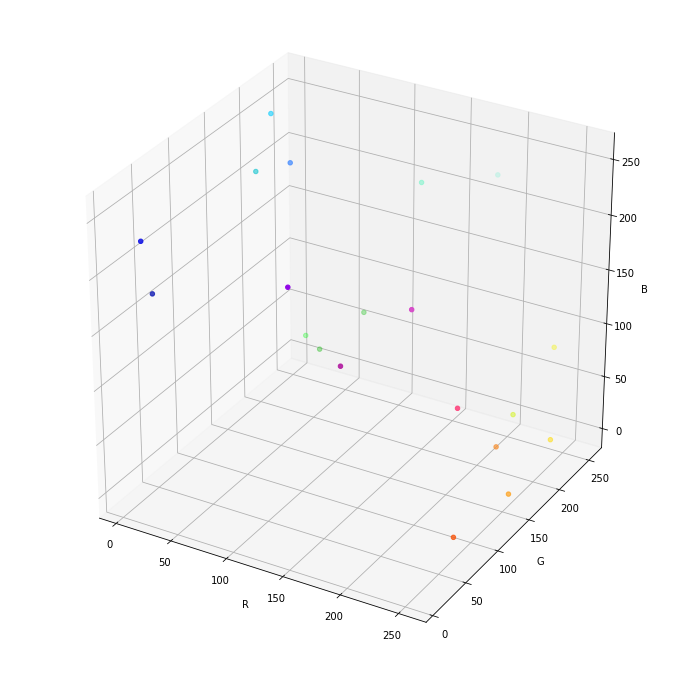

In [27]:
# 3D-plot
canvas = plt.figure().gca(projection='3d')
canvas.scatter(df_palette['r'], df_palette['g'], df_palette['b'], color=df_palette.hex.values)
canvas.set_xlabel('R')
canvas.set_ylabel('G')
canvas.set_zlabel('B')
plt.show()

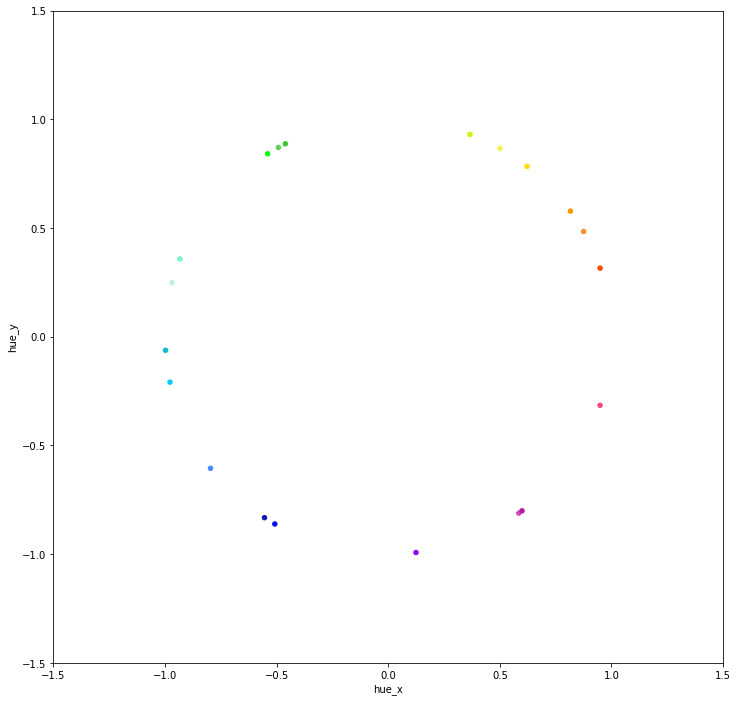

In [31]:
# draw hue circle
df_palette.plot.scatter(x='hue_x', y='hue_y', c=df_palette.hex, xlim=[-1.5,1.5], ylim=[-1.5,1.5])